# PROCESAMIENTO DE NUBES DE PUNTOS


In [3]:
! pip install open3d --force-reinstall



  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached plotly-6.1.2-py3-none-any.whl.metadata (6.9 kB)
  Using cached typing_extensions-4.14.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached nest_asyncio-1.6.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached ipython-9.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.14.1 requires numpy<2.3,>=1.23.5, but you have numpy 2.3.0 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
number_points = 5
pcd = np.random.rand(number_points, 3)  # uniform distribution over [0, 1)
print(pcd)

[[0.36466665 0.30279164 0.18642843]
 [0.99880921 0.52178833 0.58610843]
 [0.84471512 0.12365736 0.01231213]
 [0.01727504 0.98235744 0.05601963]
 [0.81218731 0.60939376 0.33949314]]


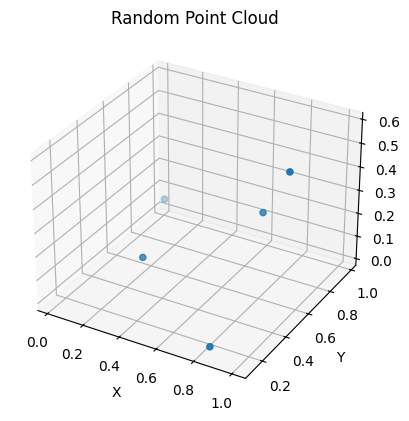

In [3]:
# Create Figure:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd[:, 0], pcd[:, 1], pcd[:, 2])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Random Point Cloud")
# display:
plt.show()

In [5]:

bunny = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny.path)

In [6]:
mesh = o3d.io.read_triangle_mesh("data/BunnyMesh.ply")

In [7]:
# Visualize:
mesh.compute_vertex_normals() # compute normals for vertices or faces
o3d.visualization.draw_geometries([mesh])

In [8]:
# Sample 1000 points:
pcd = mesh.sample_points_uniformly(number_of_points=1000)

# visualize:
o3d.visualization.draw_geometries([pcd])

In [9]:
# Save into ply file:
o3d.io.write_point_cloud("bunny_pcd.ply", pcd)

True

Como visualizar y usar datos rgb-D

In [3]:
from PIL import Image

# Verifica las dimensiones de las imágenes
color_image_path = "K1.png"
depth_image_path = "K11.png"

try:
    color = Image.open(color_image_path)
    depth = Image.open(depth_image_path)
    print(f"Dimensiones de color: {color.size}")
    print(f"Dimensiones de profundidad: {depth.size}")
except Exception as e:
    print(f"Error al cargar las imágenes: {e}")


Dimensiones de color: (640, 480)
Dimensiones de profundidad: (640, 480)


Este fue el que funciono, pero tienes que probarlo en  un .py

In [2]:
import cv2
import numpy as np
import open3d as o3d

# Cargar la imagen de color y de profundidad
color_image = cv2.imread('K2.png')
depth_image = cv2.imread('K22.png', cv2.IMREAD_UNCHANGED)  # Asumiendo que la profundidad está en 16 bits

# Parámetros de la cámara (calibración)
fx = 525.0  # Longitud focal en el eje X
fy = 525.0  # Longitud focal en el eje Y
cx = 319.5  # Centro en el eje X
cy = 239.5  # Centro en el eje Y

# Crear la nube de puntos
points = []
colors = []

for v in range(depth_image.shape[0]):
    for u in range(depth_image.shape[1]):
        Z = depth_image[v, u]  # Profundidad del píxel
        if Z == 0:  # Saltar píxeles con valores de profundidad 0 (no válidos)
            continue
        X = (u - cx) * Z / fx
        Y = (v - cy) * Z / fy
        
        # Obtener el color del píxel (en formato RGB)
        color = color_image[v, u] / 255.0  # Normalizar el color a [0, 1]
        
        points.append([X, Y, Z])
        colors.append(color)

# Convertir a un formato adecuado para Open3D
points = np.array(points)
colors = np.array(colors)

# Crear la nube de puntos
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Visualizar la nube de puntos
o3d.visualization.draw_geometries([pcd])



de open3d a numpy

In [3]:
# Create numpy pointcloud:
number_points = 2000
pcd_np = np.random.rand(number_points, 3)

# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd_np)  # set pcd_np as the point cloud points

# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

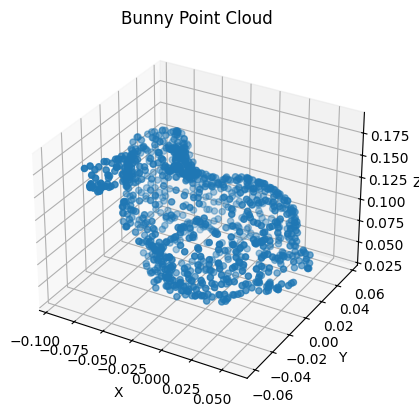

In [6]:

# Read the bunny point cloud file:
pcd_o3d = o3d.io.read_point_cloud("bunny_pcd.ply")

# Convert the open3d object to numpy:
pcd_np = np.asarray(pcd_o3d.points)

# Display using matplotlib:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd_np[:, 0], pcd_np[:, 2], pcd_np[:, 1])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bunny Point Cloud")
# display:
plt.show()

VOXELIZAR

In [1]:
import open3d as o3d
import numpy as np

# Cargar la nube de puntos desde un archivo
pcd = o3d.io.read_point_cloud("bunny_pcd.ply")  # Cambia el nombre del archivo

# Ajustar el tamaño del voxel
voxel_size = 0.009 # Puedes ajustar este valor según la resolución deseada

# Voxelizar la nube de puntos
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, voxel_size)

# Visualizar los voxeles
o3d.visualization.draw_geometries([voxel_grid])


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# ARTICULO 2

In [3]:

import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

In [4]:

# Read depth image:
depth_image = iio.imread('K22.png')

# print properties:
print(f"Image resolution: {depth_image.shape}")
print(f"Data type: {depth_image.dtype}")
print(f"Min value: {np.min(depth_image)}")
print(f"Max value: {np.max(depth_image)}")

Image resolution: (480, 640)
Data type: uint16
Min value: 0
Max value: 2184


In [6]:
import numpy as np
import imageio as iio

# Leer imagen de profundidad
depth_image = iio.imread('K22.png')

# Verificar propiedades de la imagen
print(f"Image resolution: {depth_image.shape}")
print(f"Data type: {depth_image.dtype}")
print(f"Min value: {np.min(depth_image)}")
print(f"Max value: {np.max(depth_image)}")

# Si la imagen tiene múltiples canales (como RGB), se puede convertir a escala de grises usando la media
if depth_image.ndim == 3:
    gray_image = np.mean(depth_image, axis=2).astype(np.uint8)  # Promedio de los canales RGB
else:
    gray_image = depth_image.astype(np.uint8)  # Ya es en escala de grises

# Guardar o mostrar la imagen en escala de grises
iio.imwrite('gray_K22.png', gray_image)


C:\Users\gutie\AppData\Local\Temp\ipykernel_30608\3967657267.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  depth_image = iio.imread('K22.png')


Image resolution: (480, 640)
Data type: uint16
Min value: 0
Max value: 2184


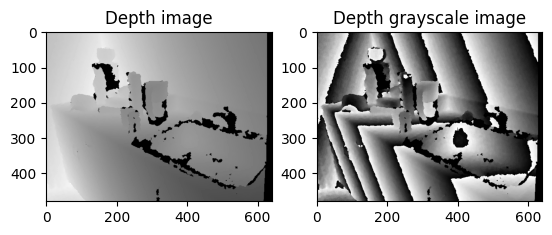

In [7]:
# Display depth and grayscale image:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(depth_image, cmap="gray")
axs[0].set_title('Depth image')
axs[1].imshow(gray_image, cmap="gray")
axs[1].set_title('Depth grayscale image')
plt.show()

In [8]:
# Depth camera parameters:
FX_DEPTH = 5.8262448167737955e+02
FY_DEPTH = 5.8269103270988637e+02
CX_DEPTH = 3.1304475870804731e+02
CY_DEPTH = 2.3844389626620386e+02

In [9]:
# compute point cloud:
pcd = []
height, width = depth_image.shape
for i in range(height):
   for j in range(width):
       z = depth_image[i][j]
       x = (j - CX_DEPTH) * z / FX_DEPTH
       y = (i - CY_DEPTH) * z / FY_DEPTH
       pcd.append([x, y, z])

C:\Users\gutie\AppData\Local\Temp\ipykernel_17144\239691437.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  depth_image = iio.imread('K22.png')


Image resolution: (480, 640)
Data type: uint16
Min value: 0
Max value: 2184


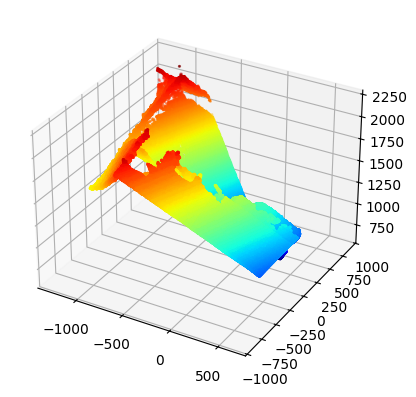

In [1]:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt

# Leer imagen de profundidad
depth_image = iio.imread('K22.png')

# Verificar propiedades de la imagen
print(f"Image resolution: {depth_image.shape}")
print(f"Data type: {depth_image.dtype}")
print(f"Min value: {np.min(depth_image)}")
print(f"Max value: {np.max(depth_image)}")

# Suponiendo que depth_image tiene un solo canal de profundidad (escala de grises)
depth_values = depth_image.astype(np.float32)  # Convertir a float para mayor precisión

# Crear malla de coordenadas (x, y)
height, width = depth_values.shape
x, y = np.meshgrid(np.arange(width), np.arange(height))

# Si la cámara tiene parámetros intrínsecos (fx, fy, cx, cy), los usamos para obtener las coordenadas reales:
fx = 525.0  # Focal length in x (ejemplo)
fy = 525.0  # Focal length in y (ejemplo)
cx = width / 2  # Centro de la imagen en x
cy = height / 2  # Centro de la imagen en y

# Calcular las coordenadas 3D usando la proyección de la cámara
# Z es la profundidad, X y Y son las coordenadas de la cámara
Z = depth_values
X = (x - cx) * Z / fx
Y = (y - cy) * Z / fy

# Filtrar los valores de profundidad que son cero o demasiado pequeños
mask = Z > 0
X = X[mask]
Y = Y[mask]
Z = Z[mask]

# Crear la nube de puntos 3D
points = np.vstack((X, Y, Z)).T

# Visualizar la nube de puntos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c=Z, cmap='jet')

# Mostrar la nube de puntos
plt.show()


In [ ]:
import numpy as np
import imageio as iio
import plotly.graph_objects as go

# Leer imagen de profundidad
depth_image = iio.imread('K22.png')

# Verificar propiedades de la imagen
print(f"Image resolution: {depth_image.shape}")
print(f"Data type: {depth_image.dtype}")
print(f"Min value: {np.min(depth_image)}")
print(f"Max value: {np.max(depth_image)}")

# Suponiendo que depth_image tiene un solo canal de profundidad (escala de grises)
depth_values = depth_image.astype(np.float32)  # Convertir a float para mayor precisión

# Crear malla de coordenadas (x, y)
height, width = depth_values.shape
x, y = np.meshgrid(np.arange(width), np.arange(height))

# Suponiendo parámetros de cámara intrínsecos (fx, fy, cx, cy)
fx = 525.0  # Focal length in x (ejemplo)
fy = 525.0  # Focal length in y (ejemplo)
cx = width / 2  # Centro de la imagen en x
cy = height / 2  # Centro de la imagen en y

# Calcular las coordenadas 3D usando la proyección de la cámara
Z = depth_values
X = (x - cx) * Z / fx
Y = (y - cy) * Z / fy

# Filtrar los valores de profundidad que son cero o demasiado pequeños
mask = Z > 0
X = X[mask]
Y = Y[mask]
Z = Z[mask]

# Crear la nube de puntos 3D usando plotly
fig = go.Figure(data=[go.Scatter3d(
    x=X, y=Y, z=Z,
    mode='markers',
    marker=dict(
        size=2,
        color=Z,  # Color por la profundidad
        colorscale='Jet',  # Escala de color
        opacity=0.8
    )
)])

# Actualizar el layout para mejorar la visualización
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title="Nube de Puntos 3D Interactiva"
)

# Mostrar la nube de puntos interactiva
fig.show()

In [3]:
# Filtro de paso (Pass-Through Filter)
def pass_through_filter(X, Y, Z, min_value, max_value):
    mask = (Z >= min_value) & (Z <= max_value)
    return X[mask], Y[mask], Z[mask]

# Aplicar el filtro de paso (ejemplo: valores de Z entre 500 y 1500)
X_filtered, Y_filtered, Z_filtered = pass_through_filter(X, Y, Z, 500, 1500)


In [ ]:
import plotly.graph_objects as go

# Visualizar la nube de puntos filtrada
fig = go.Figure(data=[go.Scatter3d(
    x=X_filtered, y=Y_filtered, z=Z_filtered,
    mode='markers',
    marker=dict(
        size=2,
        color=Z_filtered,  # Color por la profundidad
        colorscale='Jet',  # Escala de color
        opacity=0.8
    )
)])

# Actualizar el layout para mejorar la visualización
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title="Nube de Puntos Filtrada Interactiva"
)

# Mostrar la nube de puntos filtrada
fig.show()


In [7]:
from sklearn.neighbors import NearestNeighbors

# Filtro de eliminación atípica estadística
def statistical_outlier_removal(X, Y, Z, k=10, std_ratio=1.0):
    points = np.vstack((X, Y, Z)).T
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(points)
    distances, _ = nbrs.kneighbors(points)
    
    # Calcular la distancia promedio de los k vecinos más cercanos
    mean_distances = np.mean(distances, axis=1)
    std_distances = np.std(distances, axis=1)
    
    # Filtrar puntos cuya distancia está fuera de un umbral basado en la desviación estándar
    mask = mean_distances < (np.mean(mean_distances) + std_ratio * np.std(mean_distances))
    return X[mask], Y[mask], Z[mask]

# Aplicar el filtro de eliminación atípica estadística
X_filtered, Y_filtered, Z_filtered = statistical_outlier_removal(X, Y, Z, k=10, std_ratio=2.0)



In [ ]:
import plotly.graph_objects as go

# Visualizar la nube de puntos filtrada
fig = go.Figure(data=[go.Scatter3d(
    x=X_filtered, y=Y_filtered, z=Z_filtered,
    mode='markers',
    marker=dict(
        size=2,
        color=Z_filtered,  # Color por la profundidad
        colorscale='Jet',  # Escala de color
        opacity=0.8
    )
)])

# Actualizar el layout para mejorar la visualización
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title="Nube de Puntos Filtrada Interactiva"
)

# Mostrar la nube de puntos filtrada
fig.show()

In [10]:
import numpy as np
from scipy.spatial import cKDTree

# Filtro de eliminación atípica de radio
def radius_outlier_removal(X, Y, Z, radius=0.5, min_neighbors=5):
    points = np.vstack((X, Y, Z)).T  # Combinar las coordenadas en un solo array de puntos
    tree = cKDTree(points)  # Crear un árbol de búsqueda para encontrar vecinos cercanos
    
    # Encontrar los vecinos dentro del radio
    indices = tree.query_ball_point(points, radius)  # 'radius' es el radio de búsqueda
    
    # Filtrar puntos con menos de 'min_neighbors' vecinos en su radio
    mask = [len(idx) >= min_neighbors for idx in indices]  # Crear máscara booleana
    mask = np.array(mask)  # Convertir la lista de máscara en un array de numpy
    
    # Asegúrate de que las longitudes coincidan
    if len(mask) == len(X):
        return X[mask], Y[mask], Z[mask]
    else:
        raise ValueError("El tamaño de la máscara no coincide con el tamaño de las coordenadas")
    
# Aplicar el filtro de eliminación atípica de radio
X_filtered, Y_filtered, Z_filtered = radius_outlier_removal(X, Y, Z, radius=0.5, min_neighbors=5)


In [12]:
import open3d as o3d
import numpy as np

# Filtro de muestreo descendente (Voxel Grid Downsampling)
def voxel_grid_downsampling(X, Y, Z, leaf_size=0.1):
    # Crear una nube de puntos a partir de las coordenadas
    points = np.vstack((X, Y, Z)).T
    cloud = o3d.geometry.PointCloud()
    cloud.points = o3d.utility.Vector3dVector(points)

    # Aplicar el filtro de muestreo descendente
    voxel_grid = cloud.voxel_down_sample(voxel_size=leaf_size)

    # Extraer las nuevas coordenadas
    points_filtered = np.asarray(voxel_grid.points)
    return points_filtered[:, 0], points_filtered[:, 1], points_filtered[:, 2]

# Aplicar el filtro de muestreo descendente
X_filtered, Y_filtered, Z_filtered = voxel_grid_downsampling(X, Y, Z, leaf_size=0.1)


: 

In [ ]:
import open3d as o3d
import numpy as np

# Crear una nube de puntos a partir de las coordenadas
points = np.vstack((X_filtered, Y_filtered, Z_filtered)).T  # Asegúrate de usar los puntos filtrados
cloud = o3d.geometry.PointCloud()
cloud.points = o3d.utility.Vector3dVector(points)

# Visualizar la nube de puntos
o3d.visualization.draw_geometries([cloud], width=800, height=600, window_name="Point Cloud Visualization")


## TUTORIAL

solo ajusta los limites de recorte

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Rango de puntos:
x: -0.09458644218186793 a 0.05931754185301216
y: 0.03340771091198223 a 0.186697956585958
z: -0.060501705730266114 a 0.05801485290606073
Nuevos límites de z: [np.float64(-0.036798394003000744), np.float64(0.03431154117879536)]
Número de puntos después del recorte: 713


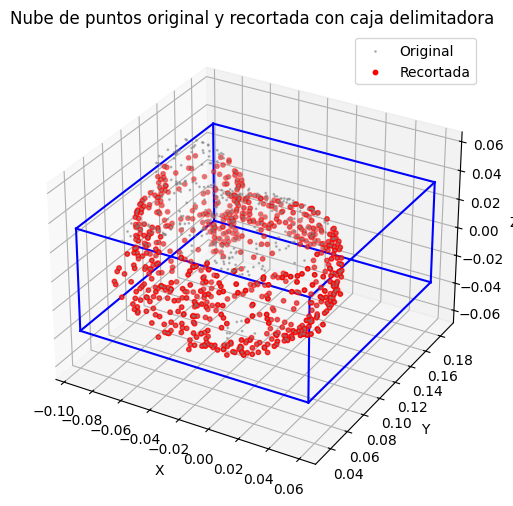

In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

if __name__ == '__main__':
    # Cargar la nube de puntos
    pcd = o3d.io.read_point_cloud("bunny_pcd.ply")
    points = np.asarray(pcd.points)

    # Mostrar rango de los puntos
    min_bound = points.min(axis=0)
    max_bound = points.max(axis=0)
    print(f"Rango de puntos:\n"
          f"x: {min_bound[0]} a {max_bound[0]}\n"
          f"y: {min_bound[1]} a {max_bound[1]}\n"
          f"z: {min_bound[2]} a {max_bound[2]}")

    # Ajustar límites dinámicos
    z_min, z_max = min_bound[2], max_bound[2]
    bounds = {
        "x": [min_bound[0], max_bound[0]],  # Todo el rango en x
        "y": [min_bound[1], max_bound[1]],  # Todo el rango en y
        "z": [z_min + 0.2 * (z_max - z_min), z_max - 0.2 * (z_max - z_min)]  # Rango ajustado en z
    }
    print(f"Nuevos límites de z: {bounds['z']}")

    # Filtrar puntos dentro de los límites
    mask = (
        (points[:, 0] >= bounds["x"][0]) & (points[:, 0] <= bounds["x"][1]) &
        (points[:, 1] >= bounds["y"][0]) & (points[:, 1] <= bounds["y"][1]) &
        (points[:, 2] >= bounds["z"][0]) & (points[:, 2] <= bounds["z"][1])
    )
    cropped_points = points[mask]

    # Verificar si hay puntos recortados
    if len(cropped_points) == 0:
        print("No hay puntos dentro del rango especificado.")
    else:
        print(f"Número de puntos después del recorte: {len(cropped_points)}")

    # Crear el marco de la caja de recorte
    box_corners = np.array([
        [bounds["x"][0], bounds["y"][0], bounds["z"][0]],
        [bounds["x"][1], bounds["y"][0], bounds["z"][0]],
        [bounds["x"][1], bounds["y"][1], bounds["z"][0]],
        [bounds["x"][0], bounds["y"][1], bounds["z"][0]],
        [bounds["x"][0], bounds["y"][0], bounds["z"][1]],
        [bounds["x"][1], bounds["y"][0], bounds["z"][1]],
        [bounds["x"][1], bounds["y"][1], bounds["z"][1]],
        [bounds["x"][0], bounds["y"][1], bounds["z"][1]],
    ])

    edges = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Base inferior
        [4, 5], [5, 6], [6, 7], [7, 4],  # Base superior
        [0, 4], [1, 5], [2, 6], [3, 7]   # Conexiones verticales
    ]

    # Visualizar usando Matplotlib
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Nube de puntos original
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='gray', s=1, alpha=0.5, label="Original")

    # Nube de puntos recortada
    if len(cropped_points) > 0:
        ax.scatter(cropped_points[:, 0], cropped_points[:, 1], cropped_points[:, 2], c='red', s=10, label="Recortada")

    # Dibujar los bordes de la caja
    for edge in edges:
        line = box_corners[edge]
        ax.plot(line[:, 0], line[:, 1], line[:, 2], color='blue')

    # Etiquetas y leyenda
    ax.set_title("Nube de puntos original y recortada con caja delimitadora")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()

    plt.show()


In [2]:
import open3d as o3d
import numpy as np

if __name__ == '__main__':
    # Leer la nube de puntos
    pcd = o3d.io.read_point_cloud("bunny_pcd.ply")  # Ajusta la ruta si es necesario
    print(f"Número total de puntos en la nube original: {len(pcd.points)}")

    # Subsampling aleatorio
    random_pcd = pcd.random_down_sample(sampling_ratio=0.1)  # Toma el 10% de los puntos
    print(f"Número de puntos tras muestreo aleatorio: {len(random_pcd.points)}")

    # Subsampling uniforme
    uniform_pcd = pcd.uniform_down_sample(every_k_points=20)  # Cada 20 puntos
    print(f"Número de puntos tras muestreo uniforme: {len(uniform_pcd.points)}")

    # Subsampling con voxel
    voxel_pcd = pcd.voxel_down_sample(voxel_size=0.05)  # Tamaño del voxel
    print(f"Número de puntos tras muestreo por voxel: {len(voxel_pcd.points)}")

    # Desplazar las nubes para visualizarlas separadas
    random_points = np.asarray(random_pcd.points)
    random_points += [-1, 0, 0]  # Mover a la izquierda
    random_pcd.points = o3d.utility.Vector3dVector(random_points)

    uniform_points = np.asarray(uniform_pcd.points)
    uniform_points += [1, 0, 0]  # Mover a la derecha
    uniform_pcd.points = o3d.utility.Vector3dVector(uniform_points)

    voxel_points = np.asarray(voxel_pcd.points)
    voxel_points += [0, -1, 0]  # Mover hacia abajo
    voxel_pcd.points = o3d.utility.Vector3dVector(voxel_points)

    # Visualizar todas las nubes juntas
    o3d.visualization.draw_geometries([pcd, random_pcd, uniform_pcd, voxel_pcd],
                                      window_name="Comparación de Subsampling",
                                      width=800, height=600)


Número total de puntos en la nube original: 1000
Número de puntos tras muestreo aleatorio: 100
Número de puntos tras muestreo uniforme: 50
Número de puntos tras muestreo por voxel: 32


outliers

In [ ]:
import open3d as o3d
import numpy as np

def visualize_pcd_with_outliers(pcd, outlier_indices, title="Nube de Puntos con Outliers", point_size=3.0):
    # Crear una copia de la nube de puntos original
    colored_pcd = o3d.geometry.PointCloud()
    colored_pcd.points = pcd.points
    
    # Crear un array de colores (gris por defecto)
    colors = np.ones((len(pcd.points), 3)) * 0.7  # Color gris para puntos normales
    
    # Marcar los outliers en magenta
    colors[outlier_indices] = [1, 0, 1]  # Color magenta para outliers
    
    # Asignar los colores a la nube de puntos
    colored_pcd.colors = o3d.utility.Vector3dVector(colors)
    
    # Crear visualizador
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name=title)
    
    # Añadir la geometría
    vis.add_geometry(colored_pcd)
    
    # Obtener las opciones de renderizado
    opt = vis.get_render_option()
    
    # Establecer el tamaño de los puntos
    opt.point_size = point_size
    
    # Ejecutar la visualización
    vis.run()
    vis.destroy_window()

def main():
    # Cargar la nube de puntos
    try:
        pcd = o3d.io.read_point_cloud("bunny_pcd.ply")
        if not pcd.has_points():
            raise ValueError("La nube de puntos no tiene puntos.")
    except Exception as e:
        print(f"Error al cargar la nube de puntos: {e}")
        return

    print(f"Número total de puntos en la nube original: {len(pcd.points)}")

    # Obtener índices de outliers usando el método de radio
    _, ind_radius = pcd.remove_radius_outlier(nb_points=16, radius=0.02)
    outlier_indices_radius = [i for i in range(len(pcd.points)) if i not in ind_radius]
    
    # Visualizar con outliers por radio
    visualize_pcd_with_outliers(pcd, outlier_indices_radius, 
                              "Nube de Puntos - Outliers por Radio en Magenta",
                              point_size=10.0)  # Aumentar tamaño de puntos

    # Obtener índices de outliers usando el método estadístico
    _, ind_stat = pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)
    outlier_indices_stat = [i for i in range(len(pcd.points)) if i not in ind_stat]
    
    # Visualizar con outliers estadísticos
    visualize_pcd_with_outliers(pcd, outlier_indices_stat, 
                              "Nube de Puntos - Outliers Estadísticos en Magenta",
                              point_size=5.0)  # Aumentar tamaño de puntos

if __name__ == '__main__':
    main()